# Phase 2 Project

## Overview

For this project, you will use regression modeling to analyze house sales in a northwestern county

## Business Problem

The need to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount

### Data Investigation

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

In [63]:
df = pd.read_csv("data\kc_house_data.csv")

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [65]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [66]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Dropping columns as per project instructions

In [67]:
df_dropped = df.drop(columns=['id', 'date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'lat','long'])
display(df_dropped)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004


In [68]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


### Dealing with null values

In [69]:
df_dropped.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [70]:
df_dropped.waterfront.fillna(0, inplace=True)
display(df_dropped.head())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


In [71]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   21597 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [72]:
df_dropped.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

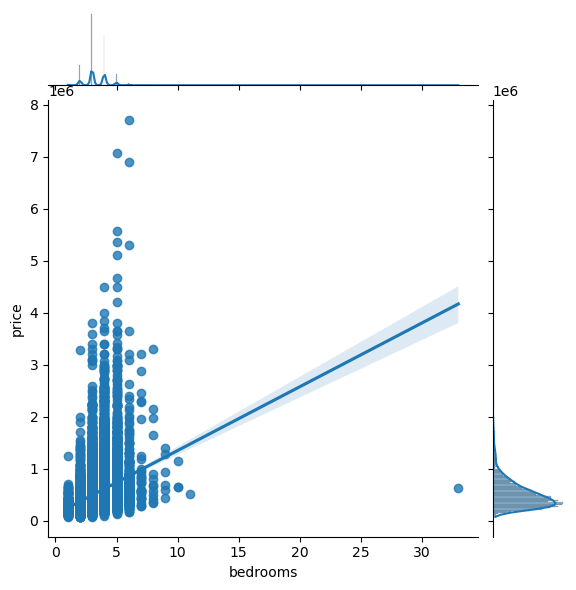

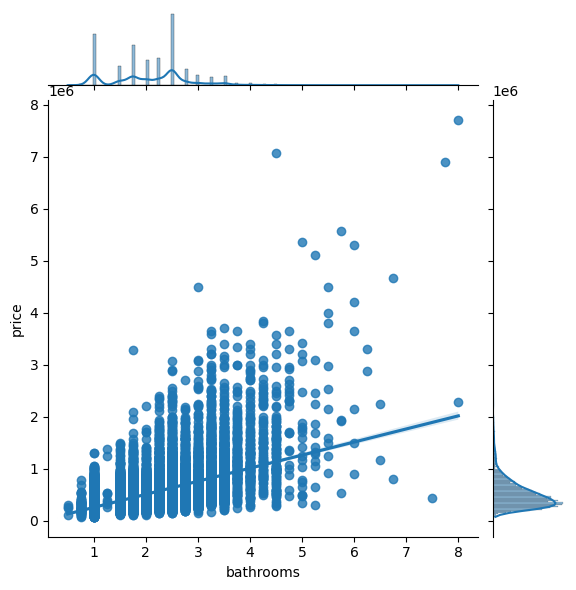

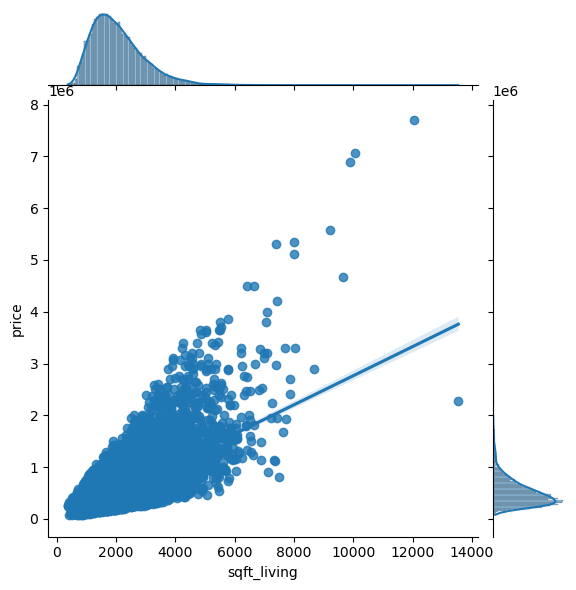

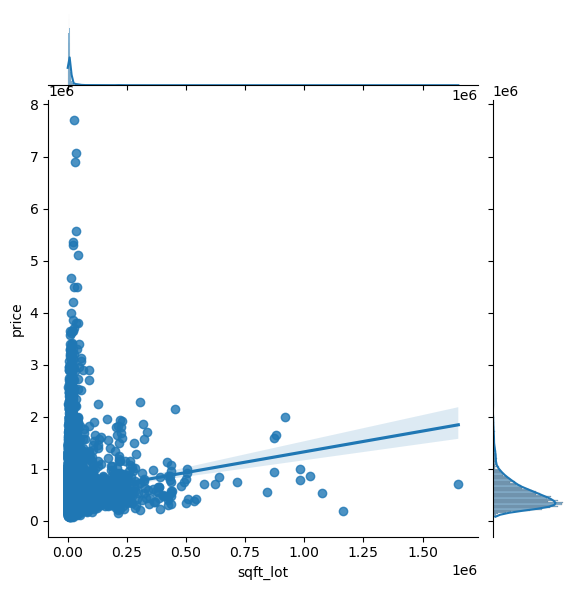

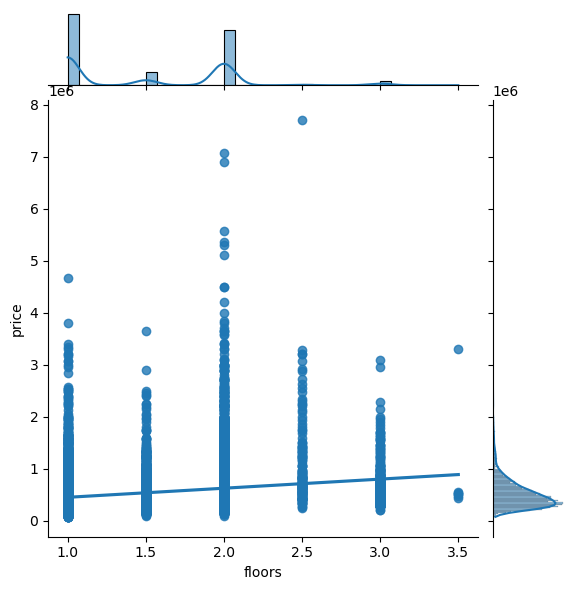

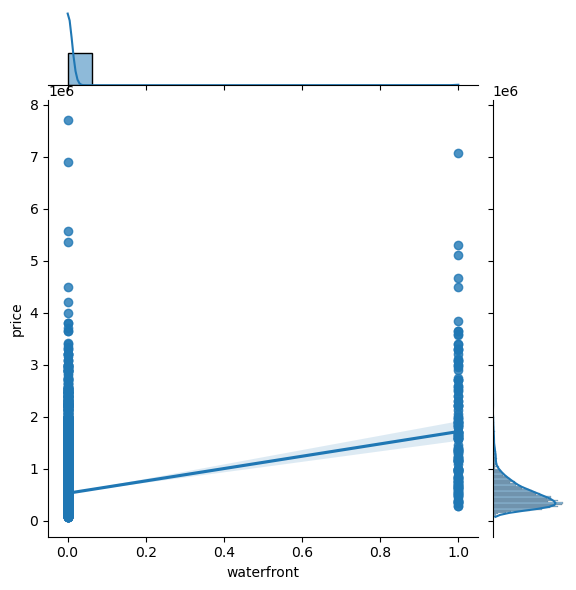

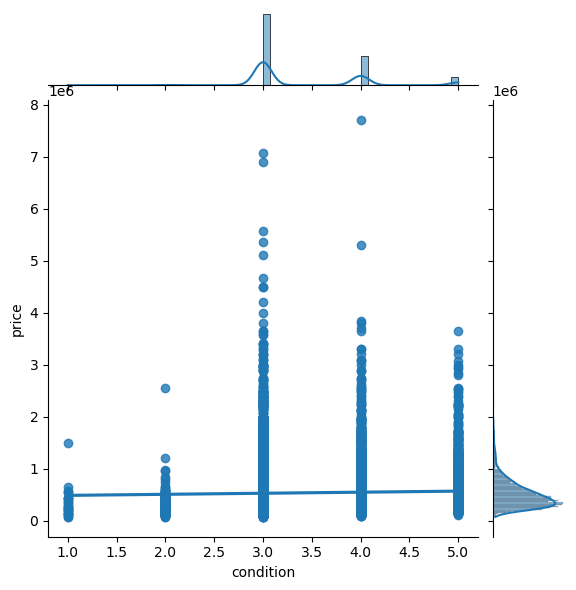

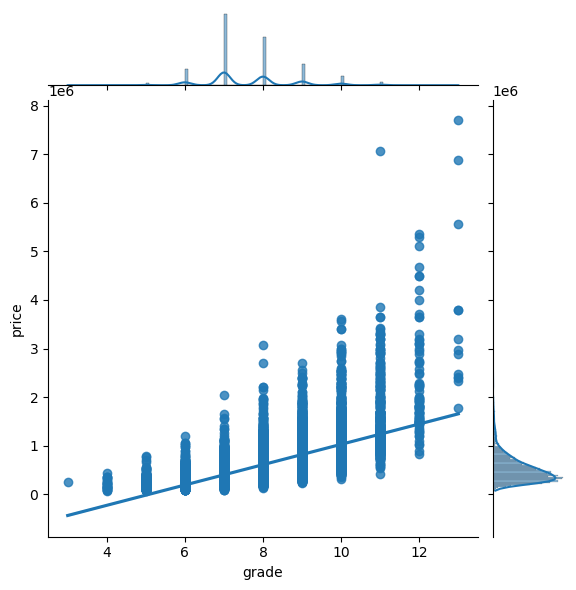

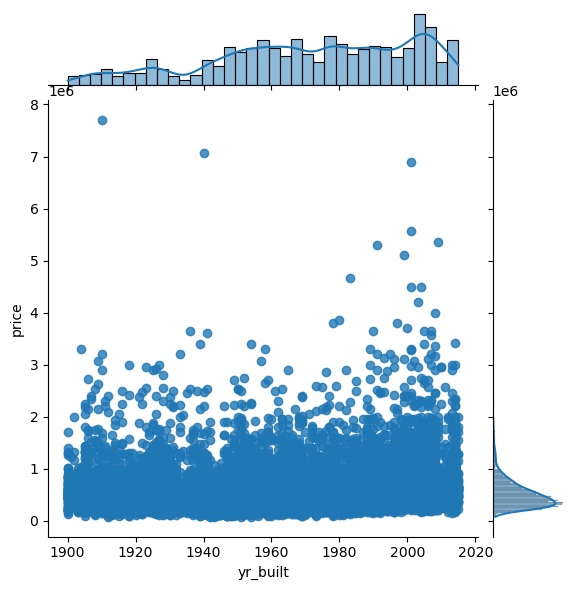

In [74]:
for col_name in df_dropped.columns[1:]:
    ax = sns.jointplot(x=col_name, y='price', data=df_dropped, kind='reg');
    

###### From the above illustration grade and sqft_living have the highest impact on price

In [75]:
outcome = 'price'
x_cols = list(df_dropped.columns)
x_cols.remove(outcome)
print(x_cols)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']


In [76]:
predictors = sm.add_constant(df_dropped.drop('price',1))
model_6 = sm.OLS(df_dropped.price, predictors).fit()
model_6.summary()

C:\Users\SFC1\AppData\Local\Temp\ipykernel_2412\3119281926.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  predictors = sm.add_constant(df_dropped.drop('price',1))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     4370.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:06:56   Log-Likelihood:            -2.9619e+05
No. Observations:               21597   AIC:                         5.924e+05
Df Residuals:                   21587   BIC:                         5.925e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.695e+06    1.3e+05     51.593      0.000    6.44e+06    6.95e+06
bedrooms    -4.257e+04   2050.780    -20.757      0.000   -4.66e+04   -3.85e+04
bathrooms    5.078e+04   3455.360     14.695      0.000     4.4e+04    5.76e+04
sqft_living   177.2180      3.303     53.646      0.000     170.743     183.693
sqft_lot       -0.2430      0.037     -6.605      0.000      -0.315      -0.171
floors         2.1e+04   3459.928      6.069      0.000    1.42e+04    2.78e+04
waterfront   7.551e+05   1.84e+04     41.124      0.000    7.19e+05    7.91e+05
condition    1.896e+04   2488.359      7.620      0.000    1.41e+04    2.38e+04
grade        1.301e+05   2156.111     60.319      0.000    1.26e+05    1.34e+05
yr_built    -3846.0915     66.732    -57.635      0.000   -3976.891   -3715.291
==============================================================================
Omnibus:                    15869.187   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1011405.789
Skew:                           2.942   Prob(JB):                         0.00
Kurtosis:                      36.005   Cond. No.                     3.84e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
PRICE = np.log(df_dropped.price)
PRICE = pd.DataFrame(PRICE)

X1= df_dropped.drop('price', 1)
y1= PRICE

C:\Users\SFC1\AppData\Local\Temp\ipykernel_2412\4196314201.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X1= df_dropped.drop('price', 1)


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)

In [79]:

for col in x_cols:
    X_train[col] = (X_train[col] - X_train[col].mean())/X_train[col].std()
display(X_train.head())
print(len(X_train), len(X_test))

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
9676,1.743275,1.148941,1.955573,-0.163241,0.941815,-0.081137,-0.631593,-0.559822,1.127812
12677,-0.405902,1.799897,1.074726,-0.196017,-0.909666,-0.081137,-0.631593,0.292416,-1.470713
8839,-0.405902,0.497985,-0.371602,-0.333551,0.941815,-0.081137,-0.631593,1.144653,1.401341
11851,-0.405902,0.497985,-0.186733,-0.230407,0.941815,-0.081137,-0.631593,0.292416,0.614945
14607,-0.405902,0.497985,-0.241106,0.155609,0.941815,-0.081137,-0.631593,0.292416,0.717519


17277 4320


In [80]:
predictors = sm.add_constant(X_train)
model_1 = sm.OLS(y_train, predictors).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     3424.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:07:01   Log-Likelihood:                -4630.3
No. Observations:               17277   AIC:                             9281.
Df Residuals:                   17267   BIC:                             9358.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0477      0.002   5419.841      0.000      13.043      13.052
bedrooms       -0.0234      0.003     -7.662      0.000      -0.029      -0.017
bathrooms       0.0705      0.004     16.399      0.000       0.062       0.079
sqft_living     0.1549      0.005     31.572      0.000       0.145       0.164
sqft_lot       -0.0018      0.002     -0.729      0.466      -0.007       0.003
floors          0.0420      0.003     13.847      0.000       0.036       0.048
waterfront      0.0430      0.002     17.707      0.000       0.038       0.048
condition       0.0257      0.003      9.816      0.000       0.021       0.031
grade           0.2727      0.004     66.345      0.000       0.265       0.281
yr_built       -0.1698      0.003    -53.640      0.000      -0.176      -0.164
==============================================================================
Omnibus:                       77.134   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.103
Skew:                          -0.106   Prob(JB):                     2.72e-20
Kurtosis:                       3.284   Cond. No.                         4.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

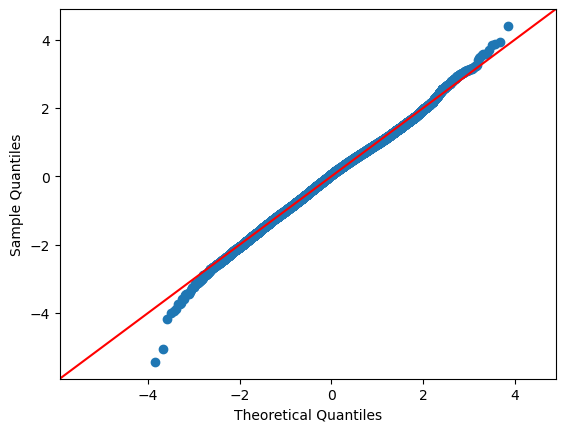

In [81]:
fig = sm.graphics.qqplot(model_1.resid, dist=stats.norm, line='45', fit=True)

In [82]:
regression = LinearRegression()
regression.fit(X_train, y_train)

#use the regression for the train and test data
y_hat_train = regression.predict(X_train)
y_hat_test = regression.predict(X_test)

#Root Mean Square Error
train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print(f'Train Root Mean Square Error: {train_rmse}')
print(f'Test Root Mean Square Error: {test_rmse}')

Train Root Mean Square Error: 0.3163417125143545
Test Root Mean Square Error: 151.6229955198368


###### Model 2

<AxesSubplot:>

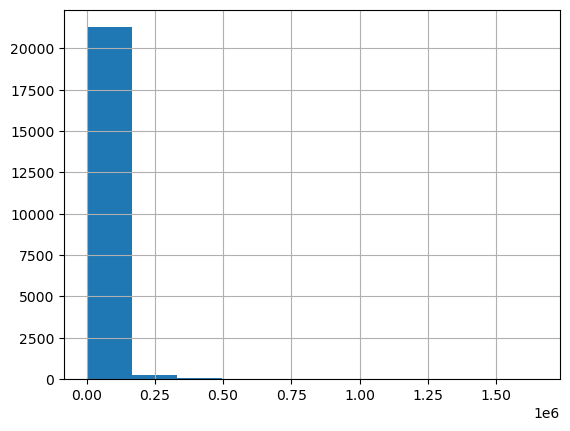

In [83]:
df_dropped.sqft_lot.hist()

<AxesSubplot:>

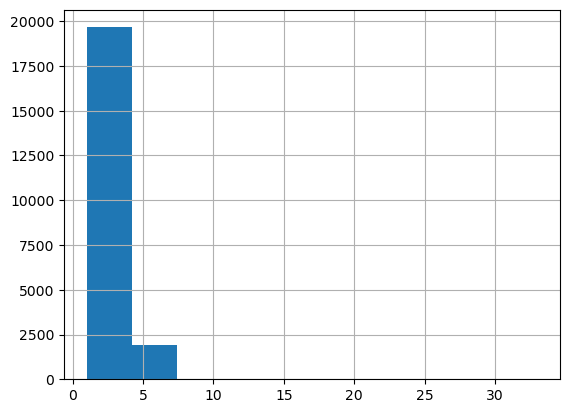

In [84]:
df_dropped.bedrooms.hist()

In [85]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q,df_dropped.sqft_lot.quantile(q=q)))

0.8 percentile: 12182.399999999998
0.81 percentile: 12558.0
0.82 percentile: 13055.439999999995
0.83 percentile: 13503.68
0.84 percentile: 14197.0
0.85 percentile: 15000.0
0.86 percentile: 15716.040000000012
0.87 percentile: 16646.640000000003
0.88 percentile: 18000.0
0.89 percentile: 19550.0
0.9 percentile: 21371.600000000006
0.91 percentile: 24149.360000000015
0.92 percentile: 28505.119999999995
0.93 percentile: 34848.0
0.94 percentile: 37643.19999999999
0.95 percentile: 43307.200000000026
0.96 percentile: 50655.28
0.97 percentile: 67381.71999999988
0.98 percentile: 107157.0
0.99 percentile: 213008.0


In [86]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q,df_dropped.bedrooms.quantile(q=q)))

0.8 percentile: 4.0
0.81 percentile: 4.0
0.82 percentile: 4.0
0.83 percentile: 4.0
0.84 percentile: 4.0
0.85 percentile: 4.0
0.86 percentile: 4.0
0.87 percentile: 4.0
0.88 percentile: 4.0
0.89 percentile: 4.0
0.9 percentile: 4.0
0.91 percentile: 4.0
0.92 percentile: 5.0
0.93 percentile: 5.0
0.94 percentile: 5.0
0.95 percentile: 5.0
0.96 percentile: 5.0
0.97 percentile: 5.0
0.98 percentile: 5.0
0.99 percentile: 6.0


In [87]:
original = len(df_dropped)
df_outlier_filter = df_dropped.copy()
df_outlier_filters = df_outlier_filter[df_outlier_filter.sqft_lot < 100000] # Subsetting to remove extreme outliers
print('Percent removed sqft_lot:', (original -len(df_outlier_filters))/original)

df_outlier_filters = df_outlier_filters[df_outlier_filters.bedrooms < 7] # Subsetting to remove extreme outliers
print('Percent removed bedrooms:', (original -len(df_outlier_filters))/original)

df_outlier_filter['price'] = np.log(df_outlier_filter['price'])

Percent removed sqft_lot: 0.021530768162244755
Percent removed bedrooms: 0.024355234523313424


In [88]:
X2 = df_outlier_filter.drop('price', 1)
y2 = df_outlier_filter['price']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

predictors = sm.add_constant(X_train2)
model_2 = sm.OLS(y_train2, predictors).fit()
model_2.summary()

C:\Users\SFC1\AppData\Local\Temp\ipykernel_2412\546768676.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X2 = df_outlier_filter.drop('price', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     3465.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:07:12   Log-Likelihood:                -4559.1
No. Observations:               17277   AIC:                             9138.
Df Residuals:                   17267   BIC:                             9216.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          21.9514      0.209    104.841      0.000      21.541      22.362
bedrooms       -0.0267      0.003     -8.125      0.000      -0.033      -0.020
bathrooms       0.0942      0.006     16.818      0.000       0.083       0.105
sqft_living     0.0002   5.34e-06     32.508      0.000       0.000       0.000
sqft_lot    -9.689e-08   6.35e-08     -1.527      0.127   -2.21e-07    2.75e-08
floors          0.0769      0.006     13.823      0.000       0.066       0.088
waterfront      0.4772      0.029     16.490      0.000       0.420       0.534
condition       0.0418      0.004     10.432      0.000       0.034       0.050
grade           0.2322      0.003     66.816      0.000       0.225       0.239
yr_built       -0.0058      0.000    -53.716      0.000      -0.006      -0.006
==============================================================================
Omnibus:                       57.896   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.612
Skew:                          -0.093   Prob(JB):                     5.66e-15
Kurtosis:                       3.237   Cond. No.                     3.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

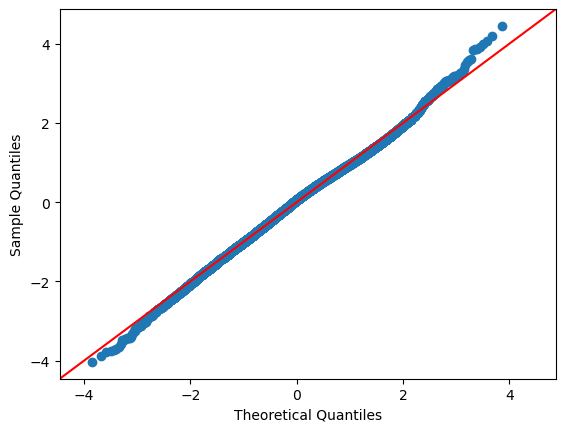

In [89]:
fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line='45', fit=True)

In [90]:
regression2 = LinearRegression()
regression2.fit(X_train2, y_train2)

#use the regression for the train and test data
y_hat_train2 = regression2.predict(X_train2)
y_hat_test2 = regression2.predict(X_test2)

#Root Mean Square Error
train_rmse2 = np.sqrt(mean_squared_error(y_train2, y_hat_train2))
test_rmse2 = np.sqrt(mean_squared_error(y_test2, y_hat_test2))

print(f'Train Root Mean Square Error: {train_rmse2}')
print(f'Test Root Mean Square Error: {test_rmse2}')

Train Root Mean Square Error: 0.31504073537848865
Test Root Mean Square Error: 0.31846421731034286


###### Model 3

In [91]:
our_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']
corr = df_dropped[our_variables].corr()
corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,0.356563,0.155670
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.665838,0.507173
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.762779,0.318152
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.114731,0.052946
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.458794,0.489193
waterfront,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.082818,-0.024487
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.146896,-0.361592
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,-0.146896,1.000000,0.447865
yr_built,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,-0.361592,0.447865,1.000000


<AxesSubplot:>

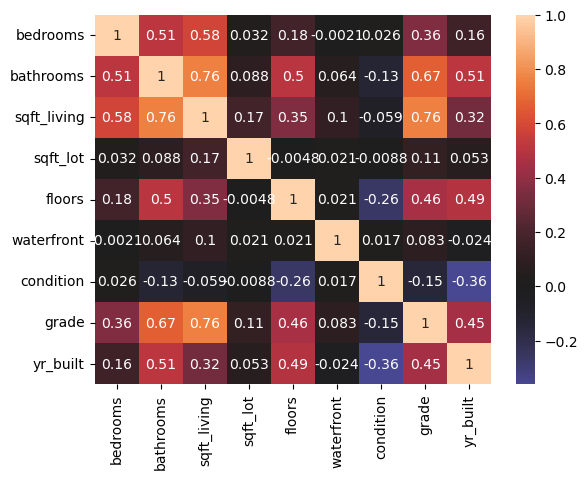

In [92]:
sns.heatmap(corr, center=0,annot = True)

In [93]:
X3 = df_outlier_filter.drop(columns=['price','grade','bathrooms'], axis=1)
y3 = df_outlier_filter['price']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2)

# Refit model with subset features
predictors = sm.add_constant(X_train3)
model_3 = sm.OLS(y_train3, predictors).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     2862.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:07:22   Log-Likelihood:                -6710.3
No. Observations:               17277   AIC:                         1.344e+04
Df Residuals:                   17269   BIC:                         1.350e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          19.0487      0.223     85.474      0.000      18.612      19.486
bedrooms       -0.0481      0.004    -13.402      0.000      -0.055      -0.041
sqft_living     0.0004   3.97e-06    106.681      0.000       0.000       0.000
sqft_lot    -1.722e-07   6.61e-08     -2.607      0.009   -3.02e-07   -4.27e-08
floors          0.1741      0.006     29.135      0.000       0.162       0.186
waterfront      0.5251      0.033     15.760      0.000       0.460       0.590
condition       0.0463      0.005     10.239      0.000       0.037       0.055
yr_built       -0.0036      0.000    -32.156      0.000      -0.004      -0.003
==============================================================================
Omnibus:                      151.209   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.343
Skew:                          -0.135   Prob(JB):                     8.52e-44
Kurtosis:                       3.450   Cond. No.                     3.66e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

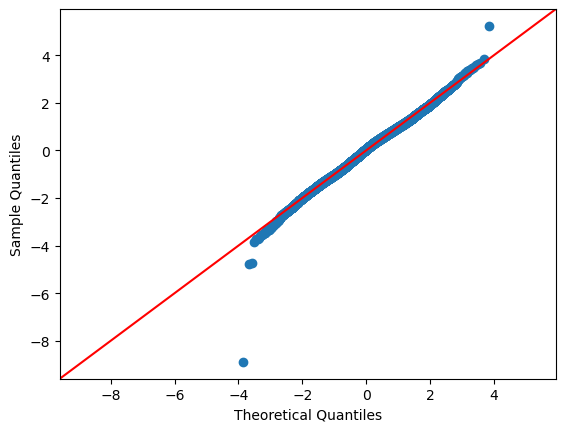

In [94]:
fig = sm.graphics.qqplot(model_3.resid, dist=stats.norm, line='45', fit=True)

In [95]:
regression3 = LinearRegression()
regression3.fit(X_train3, y_train3)

#use the regression for the train and test data
y_hat_train3 = regression3.predict(X_train3)
y_hat_test3 = regression3.predict(X_test3)

#Root Mean Square Error
train_rmse3 = np.sqrt(mean_squared_error(y_train3, y_hat_train3))
test_rmse3 = np.sqrt(mean_squared_error(y_test3, y_hat_test3))

print(f'Train Root Mean Square Error: {train_rmse3}')
print(f'Test Root Mean Square Error: {test_rmse3}')

Train Root Mean Square Error: 0.3568126704766604
Test Root Mean Square Error: 0.3550039308420332


###### Model 4

In [96]:
for col_name in df_outlier_filter.columns[1:]:
    print(col_name)
    print(df_outlier_filter[col_name].skew())

bedrooms
2.023641235344595
bathrooms
0.5197092816403838
sqft_living
1.473215455425834
sqft_lot
13.072603567136046
floors
0.6144969756263127
waterfront
12.039584643829357
condition
1.0360374245132955
grade
0.7882366363846076
yr_built
-0.4694499764949978


In [97]:
#only run once
df_outlier_filter['sqft_lot'] = np.log(df_outlier_filter['sqft_lot'])
df_outlier_filter['sqft_lot'].skew()

0.9625003856495555

<AxesSubplot:>

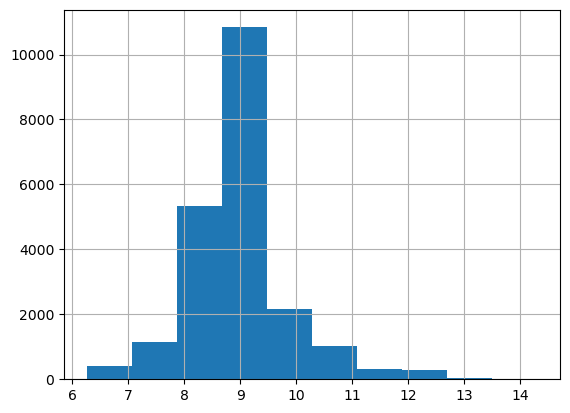

In [98]:
df_outlier_filter['sqft_lot'].hist()

In [99]:
df_outlier_filter['bedrooms'] = np.log(df_outlier_filter['bedrooms'])
df_outlier_filter['bedrooms'].skew()

-0.6805637280656164

In [100]:
X4 = df_outlier_filter.drop(columns=['price'], axis=1)
y4 = df_outlier_filter['price']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2)

# Refit model with subset features
predictors = sm.add_constant(X_train4)
model_4 = sm.OLS(y_train4, predictors).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     3512.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:07:35   Log-Likelihood:                -4435.5
No. Observations:               17277   AIC:                             8891.
Df Residuals:                   17267   BIC:                             8969.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          21.8249      0.207    105.631      0.000      21.420      22.230
bedrooms       -0.0898      0.011     -8.460      0.000      -0.111      -0.069
bathrooms       0.0746      0.006     13.411      0.000       0.064       0.085
sqft_living     0.0002   5.48e-06     36.237      0.000       0.000       0.000
sqft_lot       -0.0467      0.003    -15.011      0.000      -0.053      -0.041
floors          0.0477      0.006      8.118      0.000       0.036       0.059
waterfront      0.5344      0.029     18.259      0.000       0.477       0.592
condition       0.0464      0.004     11.584      0.000       0.039       0.054
grade           0.2305      0.003     67.379      0.000       0.224       0.237
yr_built       -0.0055      0.000    -51.434      0.000      -0.006      -0.005
==============================================================================
Omnibus:                      109.385   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.076
Skew:                          -0.112   Prob(JB):                     1.04e-30
Kurtosis:                       3.376   Cond. No.                     2.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

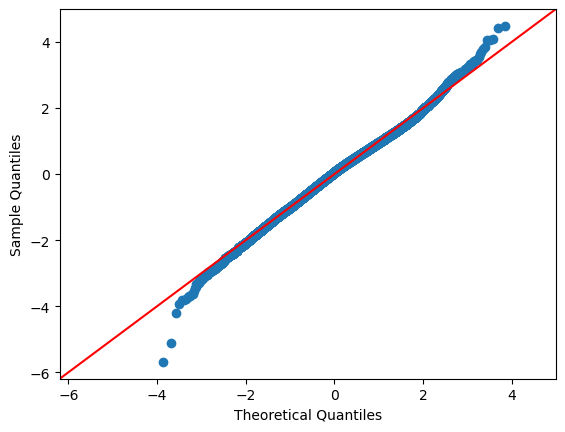

In [101]:
fig = sm.graphics.qqplot(model_4.resid, dist=stats.norm, line='45', fit=True)

In [102]:
regression4 = LinearRegression()
regression4.fit(X_train4, y_train4)

#use the regression for the train and test data
y_hat_train4 = regression4.predict(X_train4)
y_hat_test4 = regression4.predict(X_test4)

#Root Mean Square Error
train_rmse4 = np.sqrt(mean_squared_error(y_train4, y_hat_train4))
test_rmse4 = np.sqrt(mean_squared_error(y_test4, y_hat_test4))

print(f'Train Root Mean Square Error: {train_rmse4}')
print(f'Test Root Mean Square Error: {test_rmse4}')

Train Root Mean Square Error: 0.31279493570905176
Test Root Mean Square Error: 0.31700790710895016


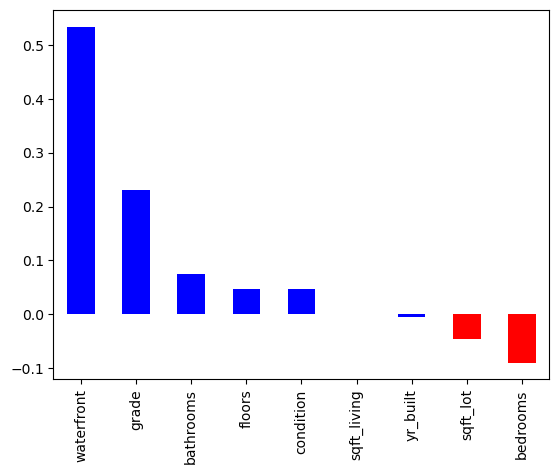

In [103]:
model_4.params[1:].sort_values(ascending=False).plot.bar(color=['blue','blue','blue','blue','blue','blue','blue','red','red','red']);

In [104]:
X_final = df_outlier_filter.drop(columns=['price'], axis=1)
y_final = df_outlier_filter['price']

predictors = sm.add_constant(X_final)
model_final = sm.OLS(y_final, predictors).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     4363.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:07:39   Log-Likelihood:                -5601.0
No. Observations:               21597   AIC:                         1.122e+04
Df Residuals:                   21587   BIC:                         1.130e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          22.0000      0.186    118.488      0.000      21.636      22.364
bedrooms       -0.0918      0.010     -9.600      0.000      -0.111      -0.073
bathrooms       0.0778      0.005     15.567      0.000       0.068       0.088
sqft_living     0.0002   4.94e-06     40.789      0.000       0.000       0.000
sqft_lot       -0.0461      0.003    -16.450      0.000      -0.052      -0.041
floors          0.0495      0.005      9.383      0.000       0.039       0.060
waterfront      0.5146      0.026     19.519      0.000       0.463       0.566
condition       0.0452      0.004     12.658      0.000       0.038       0.052
grade           0.2295      0.003     74.575      0.000       0.223       0.235
yr_built       -0.0056    9.6e-05    -58.129      0.000      -0.006      -0.005
==============================================================================
Omnibus:                      122.805   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.876
Skew:                          -0.097   Prob(JB):                     8.61e-35
Kurtosis:                       3.369   Cond. No.                     2.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
regression_final = LinearRegression()
regression_final.fit(X_final, y_final)

y_hat_final = regression_final.predict(X_final)
rmse_final = np.sqrt(mean_squared_error(y_final, y_hat_final))

print(f'Test Root Mean Square Error: {rmse_final}')

Test Root Mean Square Error: 0.3136126176096384


I used model 4 is the best fit